# Dimension Reduction 


## 1. Load and Prepare the Data

We will continue using the `College` dataset for consistency. We focus on a subset of numeric variables that are informative and somewhat correlated.

In [1]:
library(ISLR)
library(dplyr)
library(ggplot2)

data(College)
college <- College

df <- college %>% 
  select(Outstate, Room.Board, PhD, S.F.Ratio, Expend, Grad.Rate)

summary(df)

Warning message:
"package 'ISLR' was built under R version 4.3.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




    Outstate       Room.Board        PhD           S.F.Ratio    
 Min.   : 2340   Min.   :1780   Min.   :  8.00   Min.   : 2.50  
 1st Qu.: 7320   1st Qu.:3597   1st Qu.: 62.00   1st Qu.:11.50  
 Median : 9990   Median :4200   Median : 75.00   Median :13.60  
 Mean   :10441   Mean   :4358   Mean   : 72.66   Mean   :14.09  
 3rd Qu.:12925   3rd Qu.:5050   3rd Qu.: 85.00   3rd Qu.:16.50  
 Max.   :21700   Max.   :8124   Max.   :103.00   Max.   :39.80  
     Expend        Grad.Rate     
 Min.   : 3186   Min.   : 10.00  
 1st Qu.: 6751   1st Qu.: 53.00  
 Median : 8377   Median : 65.00  
 Mean   : 9660   Mean   : 65.46  
 3rd Qu.:10830   3rd Qu.: 78.00  
 Max.   :56233   Max.   :118.00  

## 2. Standardizing Variables Before PCA

PCA is based on the covariance structure of the variables, so variables should be on comparable scales.
Otherwise, variables with large magnitude (like `Expend`) can dominate the principal components.

We standardize all variables to have mean 0 and standard deviation 1.

In [2]:
df_scaled <- scale(df)
head(df_scaled)

,Outstate,Room.Board,PhD,S.F.Ratio,Expend,Grad.Rate
Abilene Christian University,-0.7458755,-0.9642836,-0.1629230,1.0131234,-0.50158700,-0.3180471
Adelphi University,0.4572019,1.9079789,-2.6739232,-0.4773970,0.16600292,-0.5509070
Adrian College,0.2011751,-0.5539604,-1.2040694,-0.3005556,-0.17717583,-0.6673369
Agnes Scott College,0.6262293,0.9961495,1.1844430,-1.6142346,1.79169738,-0.3762621
Alaska Pacific University,-0.7160471,-0.2165835,0.2045405,-0.5531862,0.24164779,-2.9377211
Albertson College,0.7604569,-0.9323696,-0.3466547,-1.1847626,0.01279812,-0.6091220


## 3. Performing PCA

### 3.1 Run PCA in R

We use `prcomp()` with centering and scaling (although we already scaled, this is harmless and keeps the code self-contained).

In [3]:
pca <- prcomp(df_scaled, center = TRUE, scale. = TRUE)
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6
Standard deviation     1.8070 0.9428 0.8404 0.74933 0.57349 0.49906
Proportion of Variance 0.5442 0.1482 0.1177 0.09358 0.05482 0.04151
Cumulative Proportion  0.5442 0.6924 0.8101 0.90367 0.95849 1.00000

### 3.2 Scree Plot

A scree plot shows the variance explained by each principal component. We often look for an "elbow" where adding more components yields diminishing returns.

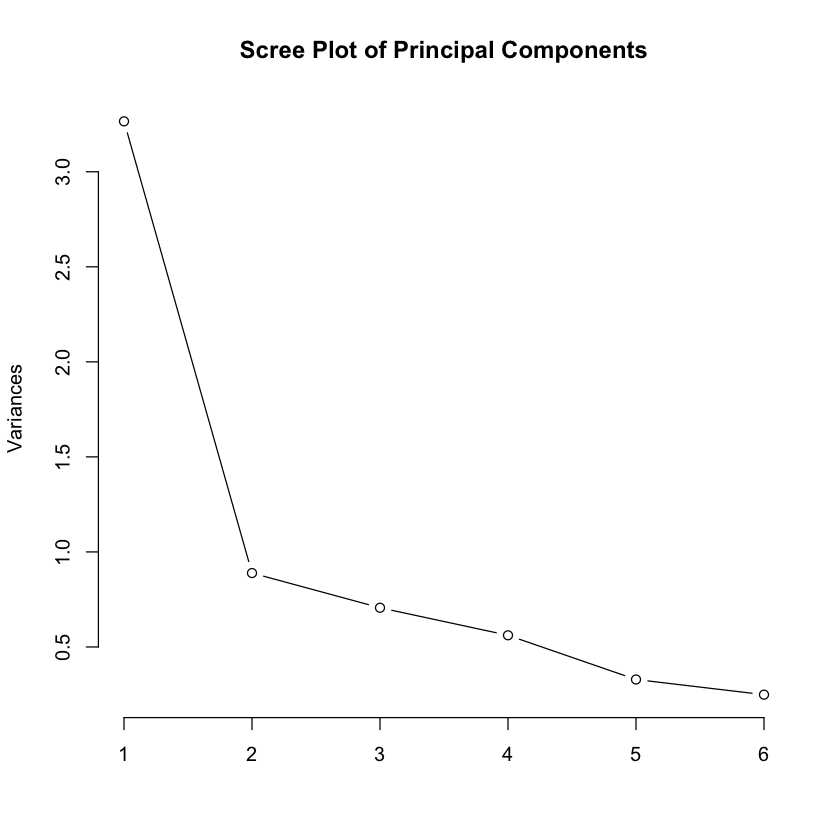

In [4]:
plot(pca, type = "l", main = "Scree Plot of Principal Components")

### 3.3 PCA Loadings (Interpretation)

The loadings (`pca$rotation`) indicate how each original variable contributes to each principal component.
Large positive or negative loadings mean a strong contribution.

In [5]:
pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6
Outstate,0.4938816,0.07217406,0.1222209,0.0965114,-0.163850986,0.83652396
Room.Board,0.4181193,-0.06116855,0.2413943,0.7815207,0.216978092,-0.32451392
PhD,0.3035908,-0.75140623,-0.4564135,-0.1573267,0.330039780,0.03507197
S.F.Ratio,-0.3739880,-0.62040248,0.2809445,0.2602062,-0.565729179,0.09245082
Expend,0.4580156,0.10959300,-0.3896243,-0.0670747,-0.705042254,-0.35329937
Grad.Rate,0.3734227,-0.17183751,0.6983843,-0.5319332,0.003608747,-0.24560280


### 3.4 PCA Scores and 2D Scatter Plot

The PCA scores (`pca$x`) are the coordinates of each data point in the new principal component space.
We start by plotting the first two principal components.

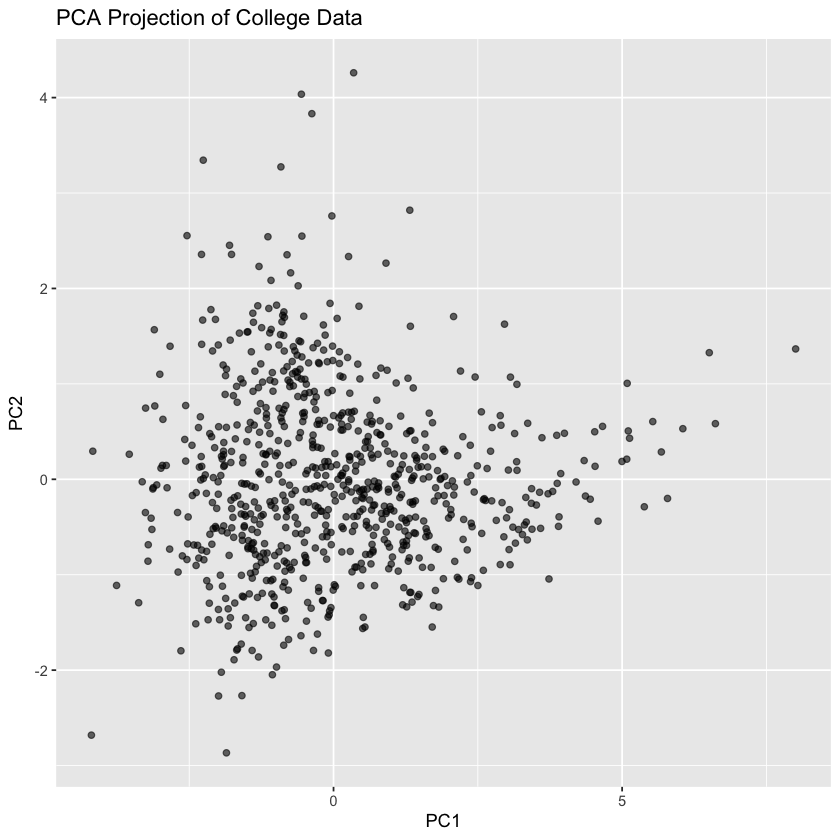

In [6]:
scores <- as.data.frame(pca$x)

ggplot(scores, aes(PC1, PC2)) + 
  geom_point(alpha = 0.6) +
  labs(title = "PCA Projection of College Data",
       x = "PC1", y = "PC2")

### 3.5 Coloring by Public/Private

The `College` dataset includes a `Private` indicator (Yes/No). Although PCA is unsupervised, we can color points by this label to help interpret the structure.

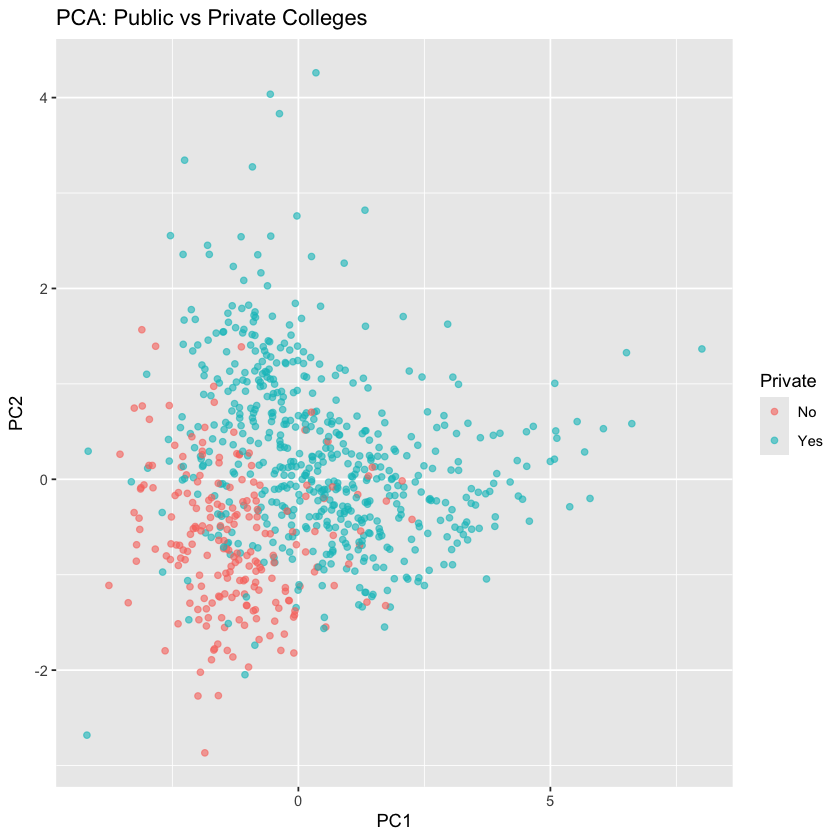

In [7]:
scores$Private <- college$Private

ggplot(scores, aes(PC1, PC2, color = Private)) +
  geom_point(alpha = 0.6) +
  labs(title = "PCA: Public vs Private Colleges",
       x = "PC1", y = "PC2")

## 4. t-SNE for Nonlinear Dimension Reduction

**t-SNE (t-distributed Stochastic Neighbor Embedding)** is a nonlinear dimension reduction method commonly used for visualization.

It aims to preserve local neighborhoods: points that are close in the original space tend to remain close in the 2D t-SNE map.

Unlike PCA, t-SNE is not used for inference or linear interpretation of components—it is purely a visualization tool.

### 4.1 Run t-SNE on the Scaled Data

In [9]:
# install.packages("Rtsne")  # Uncomment if Rtsne is not installed
library(Rtsne)

set.seed(1)
tsne_out <- Rtsne(df_scaled, dims = 2, perplexity = 30, verbose = FALSE, max_iter = 500)

tsne_df <- as.data.frame(tsne_out$Y)
names(tsne_df) <- c("X", "Y")
tsne_df$Private <- college$Private


The downloaded binary packages are in
	/var/folders/7k/pmrkdmm532g7zc20cgygtd4w0000gn/T//RtmpluDBWP/downloaded_packages


Warning message:
"package 'Rtsne' was built under R version 4.3.3"


### 4.2 Visualize t-SNE Embedding

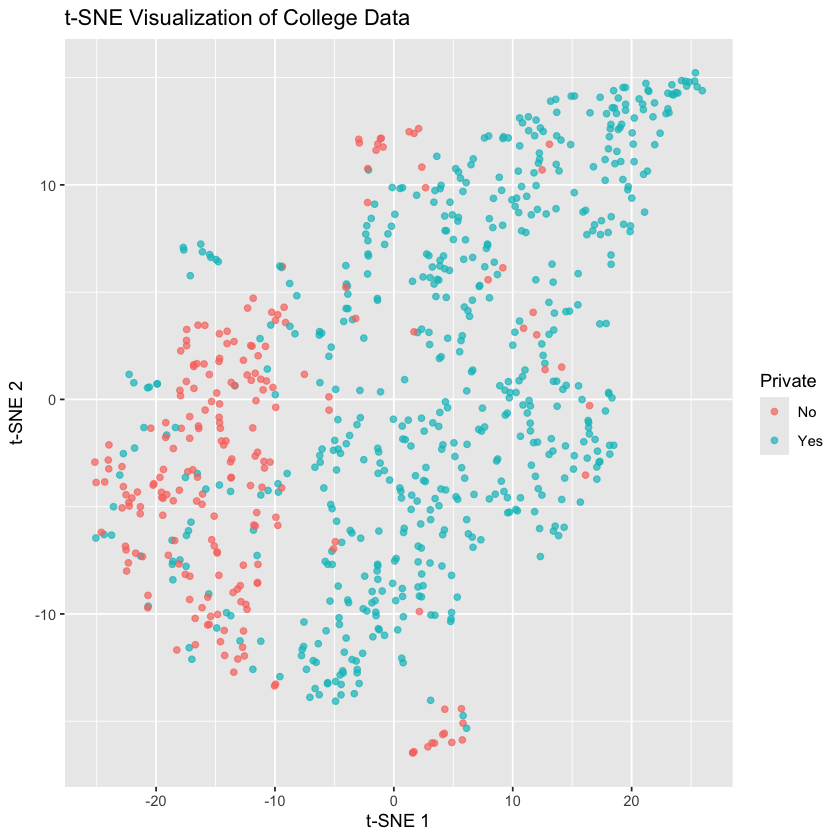

In [10]:
ggplot(tsne_df, aes(X, Y, color = Private)) +
  geom_point(alpha = 0.7) +
  labs(title = "t-SNE Visualization of College Data",
       x = "t-SNE 1", y = "t-SNE 2")

## 5. Very Brief FPCA (Functional PCA) Conceptual Overview

Up to now, we have treated each observation as a finite-dimensional vector (a row of numbers). But in some settings, each observation is a curve or function over time, such as a growth trajectory or a temperature curve.

**Functional PCA (FPCA)** extends PCA to this kind of functional data. 
- Each subject has a curve $Y_i(t)$ observed over time.
- We want to represent these infinite-dimensional curves using a few functional principal components.

Conceptually, FPCA writes each curve as:
$$Y_i(t) \approx \mu(t) + \sum_{k=1}^K A_{ik} \, \phi_k(t),$$
where:
- $\mu(t)$ is the mean function over time,
- $\phi_k(t)$ are eigenfunctions (functional analogs of PC directions),
- $A_{ik}$ are the functional PC scores.

In this lab, we do not implement FPCA in code. The goal is just to be aware that PCA ideas extend naturally to functional/longitudinal settings.

## 6. Exercises

### Exercise A Variance Explained

Compute and inspect the proportion of variance explained by each principal component.

In [11]:
var_explained <- summary(pca)$importance[2, ]
var_explained

PC1     PC2     PC3     PC4     PC5     PC6 
0.54422 0.14815 0.11773 0.09358 0.05482 0.04151

### Exercise B Interpret PC Loadings

Focus on the first two principal components. Which variables have large positive or negative loadings in each?
Use this to give each component an informal interpretation (e.g., "overall spending" or "student-faculty balance").

In [12]:
pca$rotation[, 1:2]

,PC1,PC2
Outstate,0.4938816,0.07217406
Room.Board,0.4181193,-0.06116855
PhD,0.3035908,-0.75140623
S.F.Ratio,-0.3739880,-0.62040248
Expend,0.4580156,0.10959300
Grad.Rate,0.3734227,-0.17183751
